# 📘 Section 1: Import Necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
%matplotlib inline



# 📘 Section 2: Load the California Housing Dataset

In [46]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)

# Features and target
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 📘 Section 3: Dataset Shape And Column Info

In [47]:

print("Shape of dataset:", df.shape)

print("\nDataset Info:")
print(df.info())


Shape of dataset: (20640, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


# 📘 Section 4: Missing Values Check

In [48]:

print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# 📘 Section 5: Summary Statistics (EDA part-1)

In [49]:

df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 📘 Section 6: Data Visualization (EDA part-2)

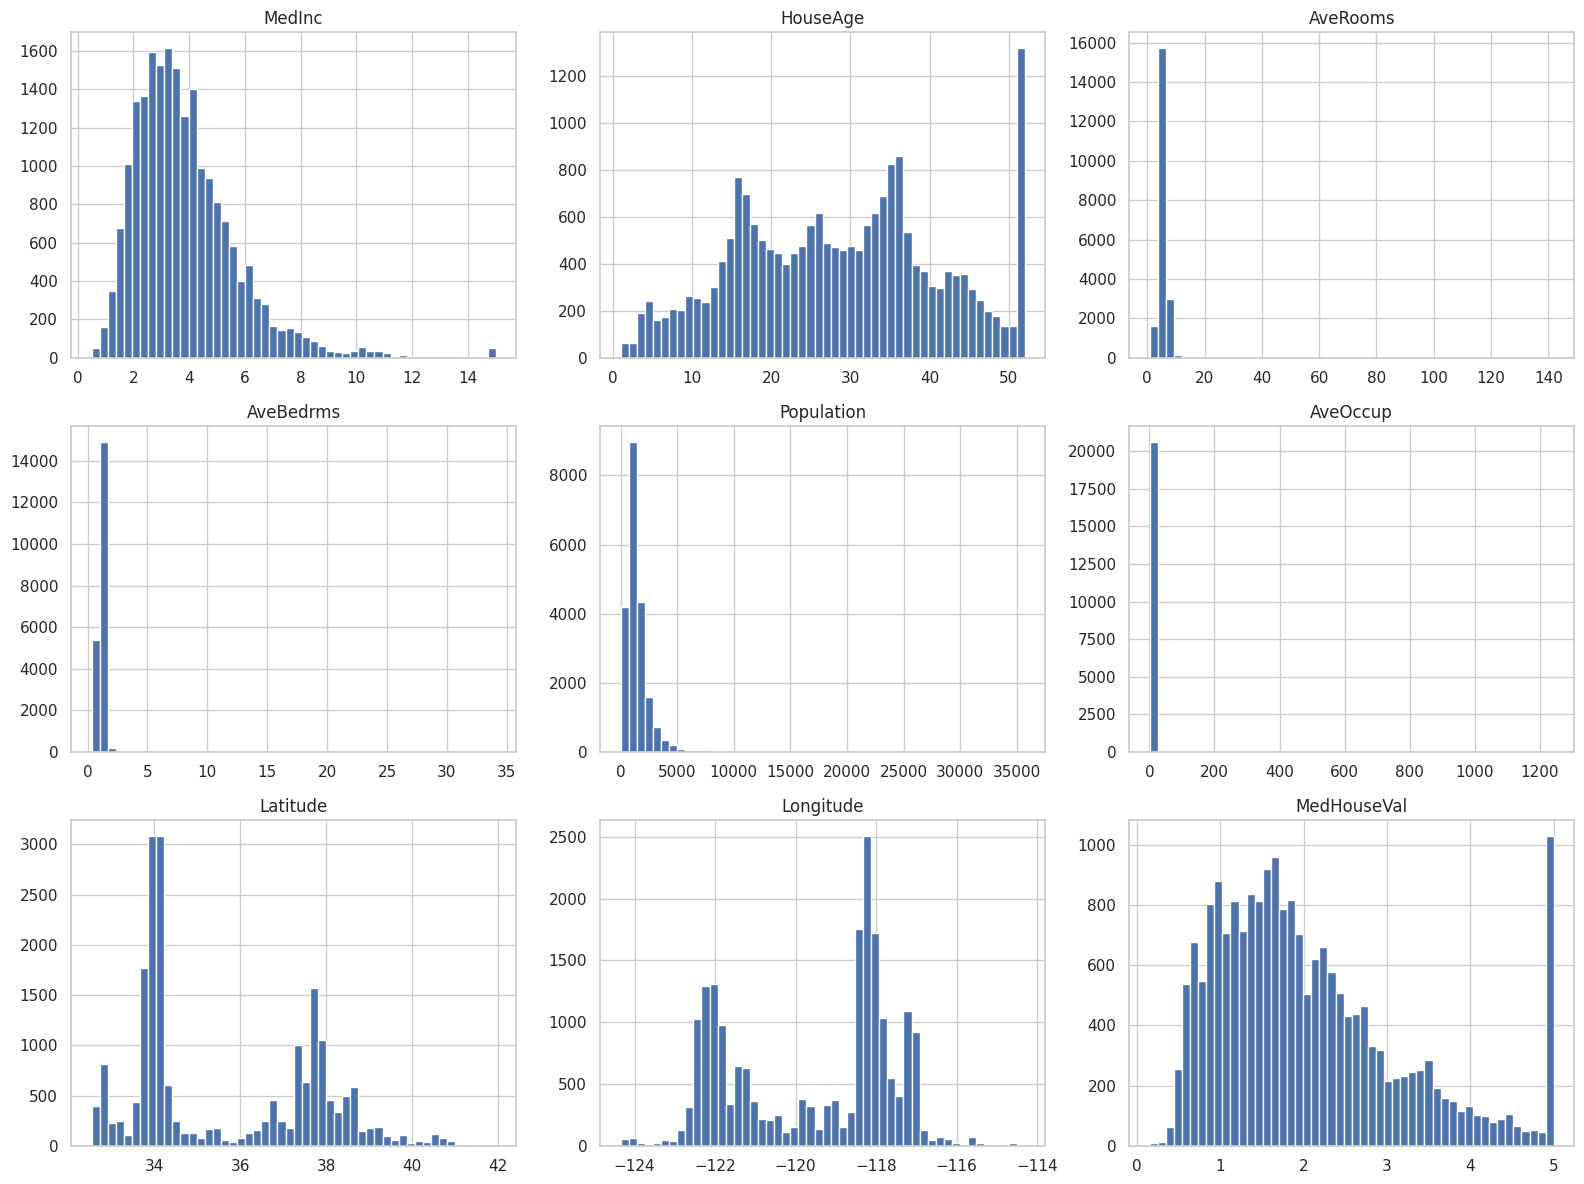

In [50]:
# Histogram: every column  distribution
df.hist(figsize=(16, 12), bins=50)
plt.tight_layout()
plt.show()


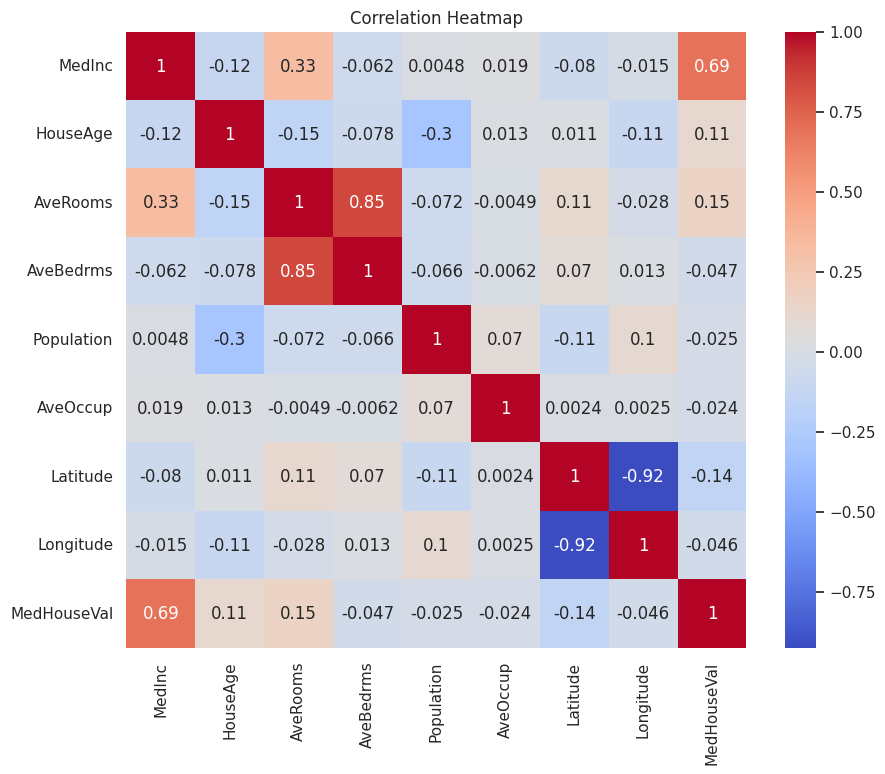

In [51]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 📘 Section 7: Clean Data (if needed)
##  Here no missing value, so we are not using anything

## 📘 Part 2: Gradient Descent with Different Learning Rates

# 🔹 Step 1: Train/Test Split

In [52]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔹 Step 2: Feature Scaling (Standardization)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only fit on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 🔹 Step 3: Custom Gradient Descent Function

In [54]:
def gradient_descent(X, y, lr=0.01, n_iters=100):
    m = X.shape[0]
    n = X.shape[1]
    
    # Initialize weights and bias
    weights = np.zeros(n)
    bias = 0
    losses = []

    for i in range(n_iters):
        # Prediction
        y_pred = np.dot(X, weights) + bias
        
        # Loss (MSE)
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)

        # Gradients
        dw = -(2/m) * np.dot(X.T, (y - y_pred))
        db = -(2/m) * np.sum(y - y_pred)

        # Update
        weights -= lr * dw
        bias -= lr * db
    
    return weights, bias, losses


# 🔹 Step 4: Train with Different Learning Rates

In [55]:
learning_rates = [0.001, 0.01, 0.1]
n_iters = 100
results = {}

for lr in learning_rates:
    w, b, loss = gradient_descent(X_train_scaled, y_train.values, lr=lr, n_iters=n_iters)
    results[lr] = loss


# 🔹 Step 5: Plot Loss vs Iterations

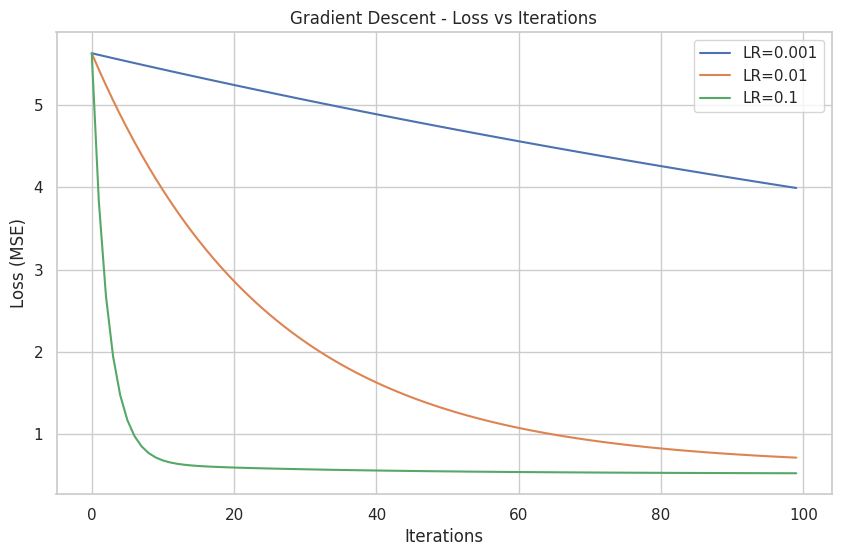

In [56]:
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(n_iters), results[lr], label=f"LR={lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent - Loss vs Iterations")
plt.legend()
plt.grid(True)
plt.show()


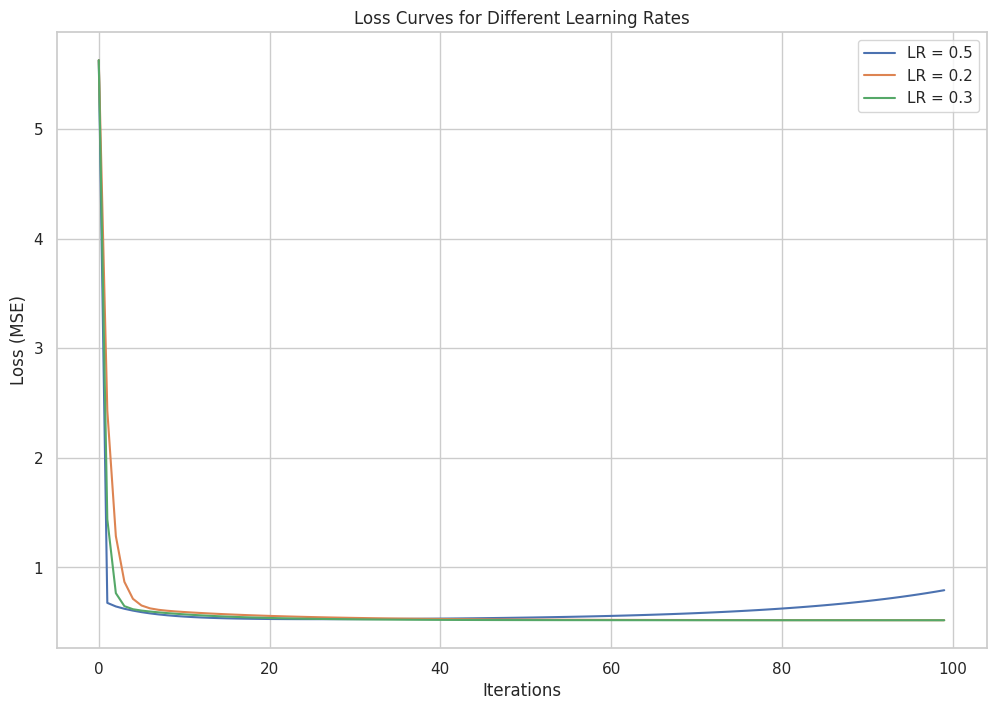

In [57]:
learning_rates = [0.5, 0.2, 0.3]
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    w, b, loss = gradient_descent(X_train_scaled, y_train.values, lr=lr, n_iters=100)
    plt.plot(range(100), loss, label=f"LR = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

#  Accuracy or performance

## 🔹 Predict on test data:

In [58]:
# Predict using manual Gradient Descent
y_pred = X_test_scaled @ w + b


## 🔹 Evaluate using RMSE:

In [59]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Manual Gradient Descent): {rmse:.4f}")


RMSE (Manual Gradient Descent): 0.7458


# Compare with sklearn's LinearRegression:

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_sklearn = model.predict(X_test_scaled)

rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print(f"RMSE (Sklearn Linear Regression): {rmse_sklearn:.4f}")


RMSE (Sklearn Linear Regression): 0.7456


# Performance improve 

## 🔹 (1) Feature Engineering

In [61]:
df['Income_rooms'] = df['MedInc'] * df['AveRooms']


## 🔹 (2) Outlier Handling

<Axes: ylabel='MedHouseVal'>

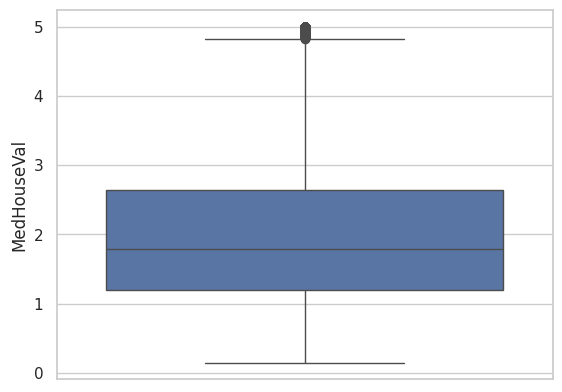

In [62]:
sns.boxplot(df["MedHouseVal"])


## 🔹 (3) Polynomial Features

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)


## 🔹 (4) Other Model try (Random Forest, XGBoost)

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 0.5027512897017218


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [66]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target

# Add new features for feature engineering
X['RoomsPerHousehold'] = X['AveRooms'] / X['HouseAge']
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
X['PopulationPerHousehold'] = X['Population'] / X['HouseAge']

# Remove outliers (only top 1% high-valued targets removed for simplicity)
q_hi = y < np.quantile(y, 0.99)
X, y = X[q_hi], y[q_hi]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "PolynomialRegression(deg=2)": Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('linreg', LinearRegression())
    ]),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train & evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ]) if 'Polynomial' not in name else model  # Polynomial pipeline has scaler inside

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    # Fix: Calculate RMSE manually instead of using squared=False
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = rmse

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE']).sort_values(by='RMSE')
print("Model RMSE Comparison:")
print("=" * 30)
print(results_df)

Model RMSE Comparison:
                                 RMSE
RandomForest                 0.476655
GradientBoosting             0.504378
PolynomialRegression(deg=2)  0.579883
LinearRegression             0.644269
Ridge                        0.644272
Lasso                        0.749030


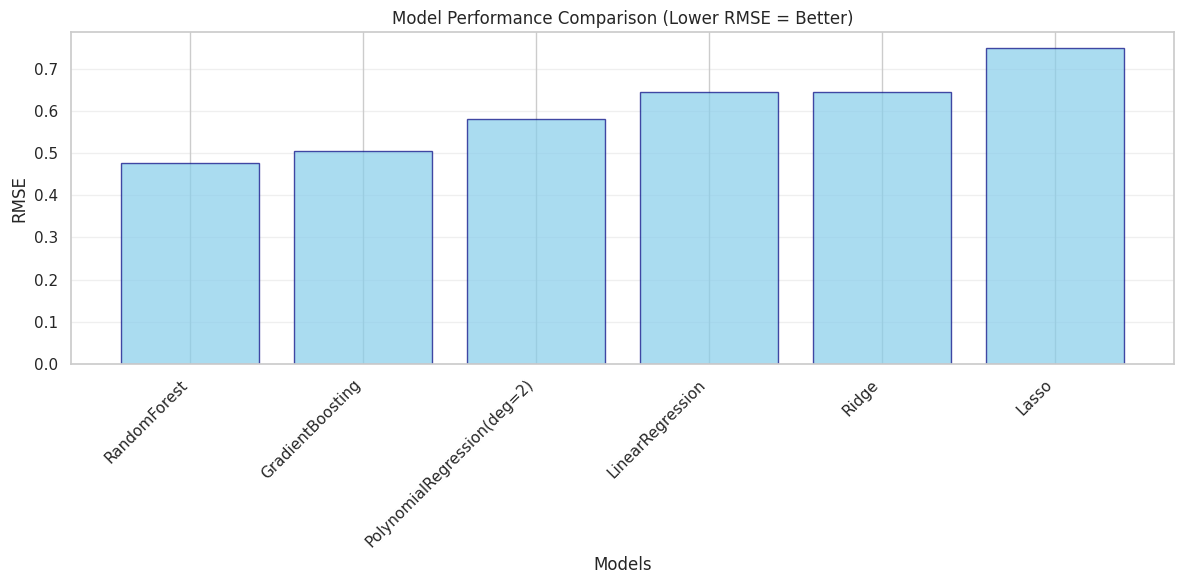


 Best Model: RandomForest
 RMSE: 0.4767
 Improvement over Linear Regression: 26.02%


In [67]:
# Visualize model performance
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df['RMSE'], color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (Lower RMSE = Better)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print best performing model
best_model = results_df.index[0]
best_rmse = results_df.iloc[0]['RMSE']
print(f"\n Best Model: {best_model}")
print(f" RMSE: {best_rmse:.4f}")

# Performance improvement percentage compared to Linear Regression
linear_rmse = results['LinearRegression']
improvement = ((linear_rmse - best_rmse) / linear_rmse) * 100
print(f" Improvement over Linear Regression: {improvement:.2f}%")

In [68]:

rmse_results = {
    "Manual Gradient Descent": 0.7458,
    "Sklearn Linear Regression": 0.7456,
    "Lasso": 0.749030,
    "Ridge": 0.644272,
    "LinearRegression": 0.644269,
    "PolynomialRegression (deg=2)": 0.579883,
    "GradientBoosting": 0.504378,
    "RandomForest": 0.476655
}

y_min = 0.14999
y_max = 5.00001
target_range = y_max - y_min

accuracy_results = {model: 1 - (rmse / target_range) 
                    for model, rmse in rmse_results.items()}

df_results = pd.DataFrame({
    "Model": list(rmse_results.keys()),
    "RMSE": list(rmse_results.values()),
    "Accuracy (%)": [round(acc * 100, 2) for acc in accuracy_results.values()]
})

# Sort by Accuracy
df_results = df_results.sort_values(by="Accuracy (%)", ascending=True).reset_index(drop=True)

print(" Model Performance (Low → High Accuracy):")
print(df_results)

# Best & Worst improvement 
best_model = df_results.iloc[-1]
worst_model = df_results.iloc[0]
improvement = best_model["Accuracy (%)"] - worst_model["Accuracy (%)"]

print(f"\n Best Model: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy (%)']}%")
print(f"   Improvement over {worst_model['Model']}: {improvement:.2f}%")



 Model Performance (Low → High Accuracy):
                          Model      RMSE  Accuracy (%)
0                         Lasso  0.749030         84.56
1       Manual Gradient Descent  0.745800         84.62
2     Sklearn Linear Regression  0.745600         84.63
3                         Ridge  0.644272         86.72
4              LinearRegression  0.644269         86.72
5  PolynomialRegression (deg=2)  0.579883         88.04
6              GradientBoosting  0.504378         89.60
7                  RandomForest  0.476655         90.17

 Best Model: RandomForest
   Accuracy: 90.17%
   Improvement over Lasso: 5.61%


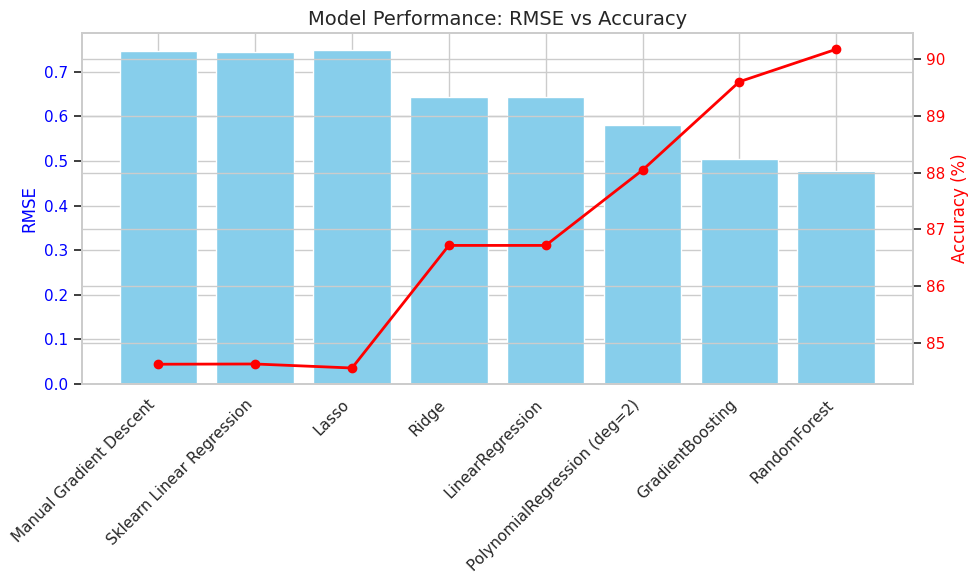

In [69]:
models = list(rmse_results.keys())       
rmse_values = list(rmse_results.values()) 
accuracy_values = [acc * 100 for acc in accuracy_results.values()] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE bar plot
ax1.bar(models, rmse_values, color="skyblue", label="RMSE")
ax1.set_ylabel("RMSE", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# set xticks and xticklabels properly
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha="right")

# Accuracy line plot (secondary axis)
ax2 = ax1.twinx()
ax2.plot(range(len(models)), accuracy_values, color="red", marker="o", linewidth=2, label="Accuracy (%)")
ax2.set_ylabel("Accuracy (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Model Performance: RMSE vs Accuracy", fontsize=14)
fig.tight_layout()
plt.show()


# 🔹 Manual Input Prediction

In [70]:
# Manual input values
manual_input = {
    'MedInc': 5.0,
    'HouseAge': 30.0,
    'AveRooms': 6.0,
    'AveBedrms': 1.2,
    'Population': 1500.0,
    'AveOccup': 3.0,
    'Latitude': 37.5,
    'Longitude': -120.5
}

# Convert to DataFrame
manual_df = pd.DataFrame([manual_input])

# Add engineered feature(s) to match training data (Income_rooms was used during fit)
manual_df['Income_rooms'] = manual_df['MedInc'] * manual_df['AveRooms']

# Ensure columns order matches what the scaler/model expect
if hasattr(scaler, "feature_names_in_"):
    manual_df = manual_df.reindex(columns=scaler.feature_names_in_)
else:
    # Fallback: if X_train exists use its columns ordering
    try:
        manual_df = manual_df[X_train.columns]
    except Exception:
        pass

print("Input values:")
print(manual_df)

# Scale the input
manual_scaled = scaler.transform(manual_df)

# Use the gradient descent model
predicted_price_gd = manual_scaled @ w + b
print(f"\nPredicted House Price (Gradient Descent):")
print(f"  ${predicted_price_gd[0] * 100000:.2f}")
print(f"  (In hundred thousands: ${predicted_price_gd[0]:.2f})")

Input values:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     5.0      30.0       6.0        1.2      1500.0       3.0      37.5   

   Longitude  
0     -120.5  

Predicted House Price (Gradient Descent):
  $222916.76
  (In hundred thousands: $2.23)


## 🔹 Try Different Values

In [71]:
# Example 1: Low income area
low_income = pd.DataFrame([{
    'MedInc': 2.5, 'HouseAge': 40.0, 'AveRooms': 4.5,
    'AveBedrms': 1.0, 'Population': 2000.0, 'AveOccup': 3.5,
    'Latitude': 34.0, 'Longitude': -118.0
}])
low_scaled = scaler.transform(low_income)
price_1 = (low_scaled @ w + b)[0]
print(f"Low Income Area: ${price_1 * 100000:.2f} (${price_1:.2f} hundred thousands)")

# Example 2: High income area
high_income = pd.DataFrame([{
    'MedInc': 8.0, 'HouseAge': 15.0, 'AveRooms': 7.5,
    'AveBedrms': 1.5, 'Population': 800.0, 'AveOccup': 2.0,
    'Latitude': 37.8, 'Longitude': -122.4
}])
high_scaled = scaler.transform(high_income)
price_2 = (high_scaled @ w + b)[0]
print(f"High Income Area: ${price_2 * 100000:.2f} (${price_2:.2f} hundred thousands)")

# Example 3: Average area
average = pd.DataFrame([{
    'MedInc': 4.0, 'HouseAge': 25.0, 'AveRooms': 5.5,
    'AveBedrms': 1.1, 'Population': 1200.0, 'AveOccup': 2.8,
    'Latitude': 36.5, 'Longitude': -119.5
}])
avg_scaled = scaler.transform(average)
price_3 = (avg_scaled @ w + b)[0]
print(f"Average Area: ${price_3 * 100000:.2f} (${price_3:.2f} hundred thousands)")

Low Income Area: $160374.24 ($1.60 hundred thousands)
High Income Area: $417182.37 ($4.17 hundred thousands)
Average Area: $169935.32 ($1.70 hundred thousands)
